# Windowing

The most common way to remedy the problem of spectral leakage is to apply a *window* to the input data before calculating the DFT. *Windowing* can reduce spectral leakage by attenuating the sidelobes of the DFT's sinc response. A window is simply a mask that truncates and scales the input data across the window. The rectangular window is the simplist form of a window. This is what the truncated sinusoid example in the [spectral leakage notebook](spectral_leakage.ipynb) used to truncate the input data before applying the DFT. The rectangular window only applies a mask to the data, but it does not apply any scaling. In order to reduce spectral leakage, the window must force the amplitude of the endpoints of an input signal towards a common amplitude. The example below illustrates a variety of window functions.

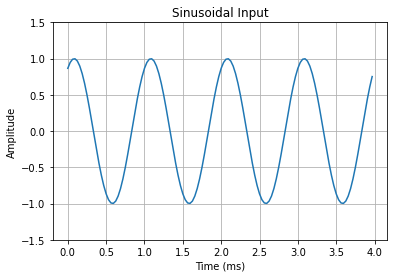

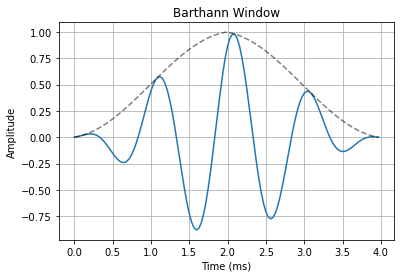

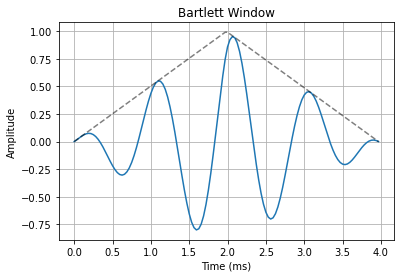

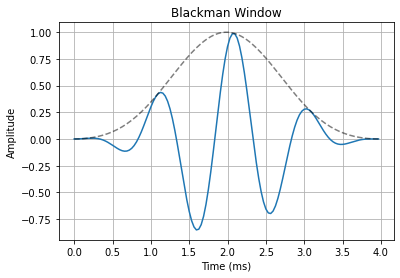

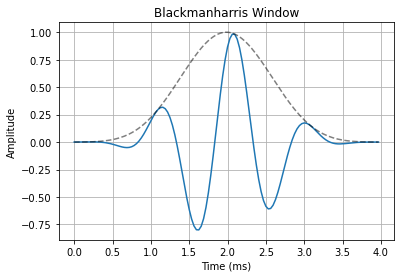

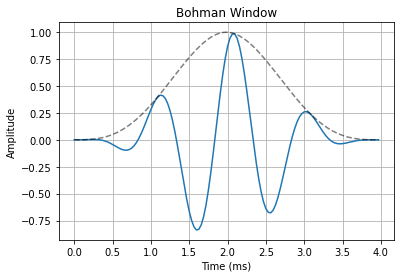

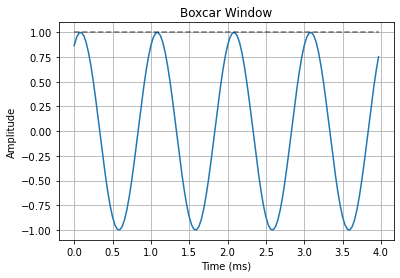

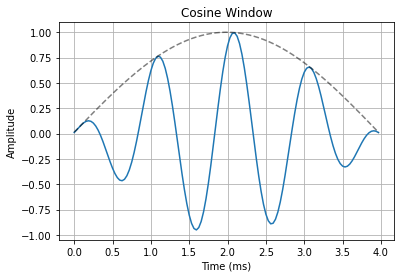

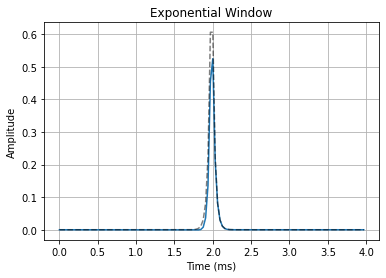

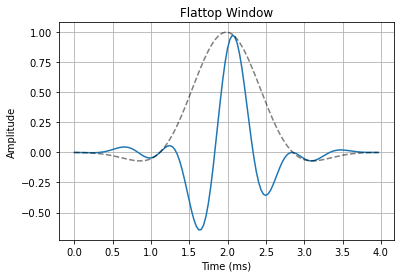

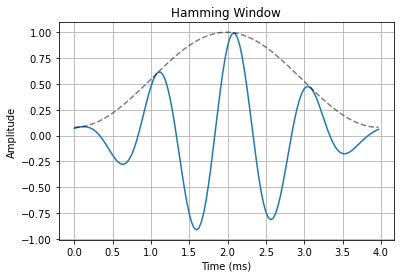

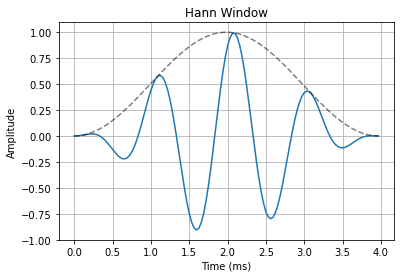

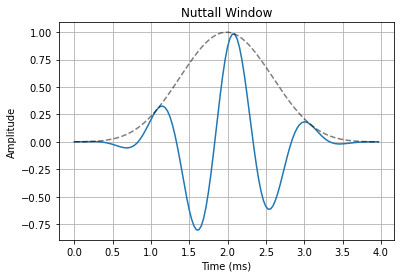

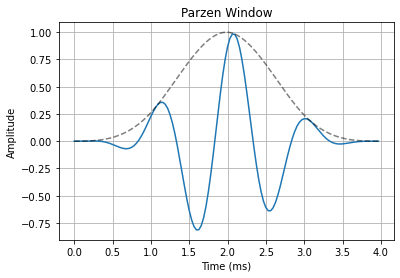

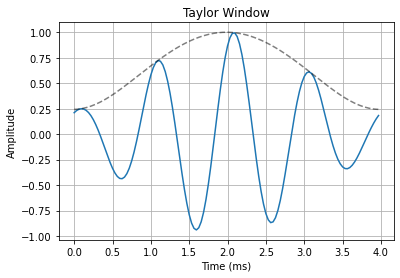

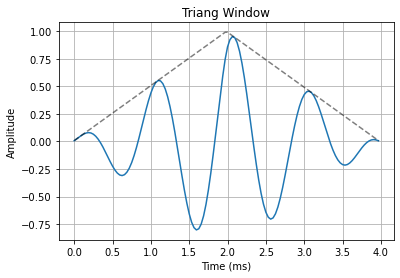

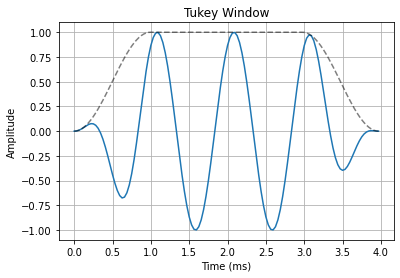

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import barthann, bartlett, blackman, blackmanharris, \
    bohman, boxcar, cosine, exponential, flattop, hamming, hann, nuttall, parzen, \
    taylor, triang, tukey


# Sample rate and period
Fs = 32e3
Ts = 1/Fs

# DFT parameters
N = 128

# Sinusoid input parameters
A0 = 1
f = 1e3
theta = np.pi/3
n = np.arange(0, N)
x_in = A0 * np.sin(2*np.pi*f*n*Ts + theta)

# Windows
windows = [barthann, bartlett, blackman, blackmanharris,
           bohman, boxcar, cosine, exponential, flattop, hamming, hann, nuttall,
           parzen, taylor, triang, tukey]

# Plot sinusoidal input
fig, ax = plt.subplots()
ax.grid()
ax.plot(n*Ts*1000, x_in)
ax.set_ylim((-1.5, 1.5))
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Amplitude')
ax.set_title('Sinusoidal Input')
plt.show()

for w in windows:
    # Plot windowed input
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(n*Ts*1000, x_in * w(N))
    ax.plot(n*Ts*1000, w(N), '--k', alpha=0.5)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Amplitude')
    ax.set_title('{} Window'.format(w.__name__.capitalize()))
    plt.show()
pass


## Using Windowing to Detect Small Signals

Windowing is particularly important when we are trying to detect a low level signal in the presence of a near by high level signal. The example below demonstrates the effects that a Hanning window has when taking the 64 point DFT of an input buffer that contains a strong signal with 3.4 cycles per input buffer and a weak signal with 7 cycles per input buffer. 

C:\Users\keato\AppData\Local\Temp\ipykernel_1040\562894732.py:32: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  y_fft_wind = fft(x_in * w(N))


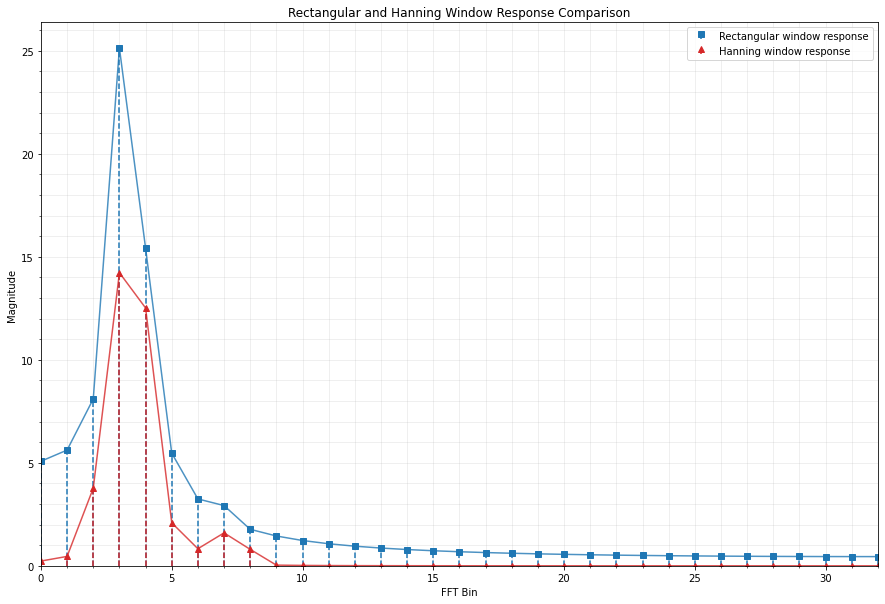

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal.windows import hanning

# DFT parameters
N = 64
n = np.arange(0, N)

# Strong signal parameters
A_strong = 1
k_strong = 3.4
theta_strong = 0
x_strong = A_strong * np.sin(2*np.pi * k_strong * n / N + theta_strong)

# Weak signal parameters
A_weak = 0.1
k_weak = 7
theta_weak = 0
x_weak = A_weak * np.sin(2*np.pi * k_weak * n / N + theta_weak)

# Composite signal
x_in = x_strong + x_weak

# Window function 
# (you can try swapping this with other windows to see their responses)
w = hanning
window_name = w.__name__.capitalize()

# Calculate the FFTs on the input and windowed input data
y_fft = fft(x_in)
y_fft_wind = fft(x_in * w(N))

# Plot the comparison between the rectangular window and the selected window
fig, ax = plt.subplots(figsize=(15,10))
ax.minorticks_on()
ax.grid(True, which='both', alpha=0.25)
ax.stem(n, np.abs(y_fft), basefmt=' ', markerfmt='sC0', linefmt='C0--', label='Rectangular window response')
ax.plot(n, np.abs(y_fft), c='C0', alpha = 0.8)
ax.stem(n, np.abs(y_fft_wind), basefmt=' ', markerfmt='^C3', linefmt='C3--', label='{} window response'.format(window_name))
ax.plot(n, np.abs(y_fft_wind), c='C3', alpha = 0.8)
ax.set_xlabel('FFT Bin')
ax.set_ylabel('Magnitude')
ax.set_title('Rectangular and {} Window Response Comparison'.format(window_name))
ax.set_xlim((0, N/2))
ax.set_ylim(bottom=0)
ax.legend()
pass